In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

# import os
# for dirname, _, filenames in os.walk('/kaggle/input'):
#     for filename in filenames:
#         print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

### Workflow Outline

1. **Preprocessing**
   - **Volume Normalization**: Adjust the volume across all audio files to ensure uniformity in audio levels.
   - **Noise Reduction**: Apply techniques to reduce background noise, enhancing the clarity of heart sounds.
   - **Audio Segmentation**: If the audio files contain multiple segments, we’ll break them down into smaller, more manageable parts for consistent analysis.
   - **Feature Extraction (MFCC)**: Extract Mel Frequency Cepstral Coefficients (MFCCs), which are commonly used in sound analysis, to create a meaningful representation of each audio sample.

2. **Model Development**
   - **Feature Engineering**: Prepare the MFCCs and other possible audio features for input into the model.
   - **Bidirectional LSTM Model**:
     - Design and implement a Bidirectional Long Short-Term Memory (LSTM) neural network.
     - Optimize layers and hyperparameters (number of LSTM units, dropout rate, etc.) for sequential audio analysis.

3. **Model Training & Evaluation**
   - **Train the Model**: Feed the preprocessed data into the Bidirectional LSTM model.
   - **Evaluate Performance**: Use metrics like F1 Score to assess model performance, with a focus on precision and recall across the different heart sound categories.

4. **Fine-Tuning**:
   - **Optimize Hyperparameters**: Adjust learning rate, batch size, and number of LSTM units to maximize the model’s ability to generalize.
   - **Experiment with Additional Features**: Explore additional features beyond MFCC if needed (e.g., Chroma, Spectral Contrast).

5. **Final Evaluation & Reporting**:
   - **Test on Holdout Set**: Use a final test set to gauge model robustness.
   - **Summarize Results**: Document precision, recall, and F1 scores across categories, and generate insights about model performance.

In [2]:
import os

In [3]:
file_path = '/kaggle/input/new-heart-sound-dataset/Heart_Sound_Data'

In [4]:
category = os.listdir(file_path)
category

['Murmur_Heart_Sound',
 'Extrahals_Heart_Sound',
 'Normal_Heart_sound',
 'Artifact_Heart_Sound']

In [5]:
total_sound_data = 0
for i in category:
    count = len(os.listdir(file_path+'/'+i))
    total_sound_data += count
    print(f'{i}:{count}')

print(f'Total Sound Data is: {total_sound_data}')

Murmur_Heart_Sound:34
Extrahals_Heart_Sound:19
Normal_Heart_sound:31
Artifact_Heart_Sound:40
Total Sound Data is: 124


To load and analyze `.wav` files, we’ll use the `librosa` library, which is popular for audio processing in Python. Here’s the step-by-step approach and the code you can run on your end.

### Steps:
1. **Install `librosa`**: If you haven’t already, install `librosa` by running:
   ```bash
   pip install librosa
   ```
2. **Load Audio Files**: Load each `.wav` file, and check properties like sample rate and duration.
3. **Analyze Properties**: Calculate the sample rate, number of samples, and duration of each file.

### Code to Load and Analyze Audio Files

Here’s the code snippet to load and analyze audio files using `librosa`. This code will:
- Load each file.
- Print the sample rate and duration.
- Display a summary of these properties.

### Explanation

1. **librosa.load()**: Loads the audio file. Setting `sr=None` keeps the original sample rate of the file, which is important for initial analysis.
2. **librosa.get_duration()**: Calculates the duration of the audio file in seconds.
3. **Loop through categories**: We loop through each category folder to process every `.wav` file.
4. **Summary Output**: The code prints and stores each file's properties, including filename, category, sample rate, and duration.

Run this code and let me know if you have questions about any part of it! Once you’ve checked out the properties, we can proceed with normalization and further preprocessing.

In [6]:
import librosa
import os
import pandas as pd

In [7]:
# Path to the extracted dataset
dataset_path = '/kaggle/input/new-heart-sound-dataset/Heart_Sound_Data'  # Update this to match your path

In [8]:
# Initialize a list to store audio file properties
audio_properties = []

# Loop through each category and file in the dataset
for category in os.listdir(dataset_path):
    category_path = os.path.join(dataset_path, category)
    if os.path.isdir(category_path):
        for filename in os.listdir(category_path):
            file_path = os.path.join(category_path, filename)
            try:
                # Load the audio file
                audio_data, sample_rate = librosa.load(file_path, sr=None)
                duration = librosa.get_duration(y=audio_data, sr=sample_rate)
                
                # Append properties to the list
                audio_properties.append({
                    'filename': filename,
                    'category': category,
                    'sample_rate': sample_rate,
                    'duration': duration
                })
                
                # Print file details
#                 print(f"Loaded {filename} - Category: {category} - Sample Rate: {sample_rate} Hz - Duration: {duration:.2f} seconds")
                
            except Exception as e:
                print(f"Error loading {filename}: {e}")



In [9]:
# Create a DataFrame for better viewing
audio_df = pd.DataFrame(audio_properties)
display(audio_df.head())

,filename,category,sample_rate,duration
0,201108222221.wav,Murmur_Heart_Sound,44100,7.935556
1,201108222223.wav,Murmur_Heart_Sound,44100,7.935556
2,201102051443.wav,Murmur_Heart_Sound,44100,6.818934
3,201108222251.wav,Murmur_Heart_Sound,44100,7.935556
4,201108222246.wav,Murmur_Heart_Sound,44100,7.935556


To play the audio files in Python, you can use the `IPython.display` library's `Audio` function. This allows us to listen to the sound files directly in a Jupyter notebook or compatible Python environment.

### Explanation
1. **Audio File Path**: Update `example_file_path` with the path of the audio file you want to play.
2. **Audio Display**: The `Audio` function from `IPython.display` takes in the audio data and sample rate, enabling playback in a Jupyter notebook or interactive environment.

Let me know if you’d like more examples or have any questions! Once you’re comfortable, we can move forward with further preprocessing steps.

In [10]:
import librosa
from IPython.display import Audio
import os

# Define the path to one of the audio files
example_file_path = '/kaggle/input/new-heart-sound-dataset/Heart_Sound_Data/Artifact_Heart_Sound/201012172012.wav'  # Update this to match your file path

# Load the audio file
audio_data, sample_rate = librosa.load(example_file_path, sr=None)

# Play the audio
print(f"Playing audio file: {example_file_path}")
Audio(data=audio_data, rate=sample_rate)


Playing audio file: /kaggle/input/new-heart-sound-dataset/Heart_Sound_Data/Artifact_Heart_Sound/201012172012.wav


In [11]:
# Choose an index to select a specific audio file (e.g., index 0)
index = 0  # Change this to select a different file

# Get the file path details from the DataFrame
selected_file = audio_df.iloc[index]
category = selected_file['category']
filename = selected_file['filename']

# Construct the full path
file_path = os.path.join(dataset_path, category, filename)

# Load and play the selected audio file
audio_data, sample_rate = librosa.load(file_path, sr=None)
print(f"Playing audio file: {filename} - Category: {category}")
Audio(data=audio_data, rate=sample_rate)

Playing audio file: 201108222221.wav - Category: Murmur_Heart_Sound


# normalization process

We begin by defining a target RMS level, which will standardize the loudness of all audio files. The normalization process involves a function that calculates the current RMS of each audio sample and then computes a scaling factor to adjust the volume to match our target RMS. We then loop through each file listed in the original `audio_df` DataFrame, loading each audio file using `librosa`. After loading, we normalize the volume by multiplying the audio samples by the calculated scaling factor. Instead of saving each normalized audio file to disk, we store them in memory by appending relevant details—such as the filename, category, sample rate, and the normalized audio samples (as NumPy arrays)—into a list. Once all files are processed, this list is converted into a new DataFrame, `normalized_audio_df`, which stores the normalized audio data. This approach allows us to proceed directly with further preprocessing steps without needing to re-read files from disk, making it more efficient for continuous processing.

In [12]:
# import librosa
# import numpy as np
# import pandas as pd

# # Set a target RMS level
# target_rms = 0.1  # Adjust this as needed based on your dataset's properties



# # Revised normalize function with scaling factor cap and clipping
# def normalize_volume(audio_data, target_rms, max_scaling_factor=10.0):
#     current_rms = np.sqrt(np.mean(audio_data**2))
#     scaling_factor = min(target_rms / current_rms, max_scaling_factor)
#     normalized_audio = audio_data * scaling_factor
    
#     # Clip the audio to prevent extreme values
#     normalized_audio = np.clip(normalized_audio, -1.0, 1.0)
    
#     return normalized_audio

# # Initialize a list to store normalized audio data
# normalized_audio_data = []

# # Loop through each file in the DataFrame and normalize
# for _, row in audio_df.iterrows():
#     category = row['category']
#     filename = row['filename']
#     file_path = os.path.join(dataset_path, category, filename)
    
#     try:
#         # Load audio data
#         audio_data, sample_rate = librosa.load(file_path, sr=None)
        
#         # Normalize the volume
#         normalized_audio = normalize_volume(audio_data, target_rms)
        
#         # Store normalized data in a list
#         normalized_audio_data.append({
#             'filename': filename,
#             'category': category,
#             'sample_rate': sample_rate,
#             'normalized_audio': normalized_audio
#         })
        
# #         print(f"Normalized: {filename} - Category: {category}")
        
#     except Exception as e:
#         print(f"Error processing {filename}: {e}")

# # Convert to DataFrame
# normalized_audio_df = pd.DataFrame(normalized_audio_data)

# # Display the first few rows
# display(normalized_audio_df.head())

# Noise Reduction

1. **Noise Reduction Function**:
   - **High-Pass Filter**: The `butter` and `filtfilt` functions from `scipy.signal` apply a high-pass filter to the audio. This filter removes low-frequency noise by allowing only frequencies above a set threshold to pass through, reducing background hum or low-frequency interference.
   - **Spectral Gating (Thresholding)**: We set a threshold based on the maximum amplitude in the audio data (scaled by `noise_reduction_factor`). Any audio segment below this threshold is assumed to be noise and is set to zero, while segments above the threshold are preserved. This process, called "spectral gating," is a simple yet effective way to filter out low-energy noise.

2. **Loop through Each File**:
   - **Iterate over Normalized Data**: We loop through each row in `normalized_audio_df`, which contains normalized audio data for each file.
   - **Apply Noise Reduction**: For each audio sample, we call `reduce_noise` to get a noise-reduced version of the audio.
   - **Store Results**: Each cleaned audio segment is stored in a list (`noise_reduced_audio_data`) along with the filename, category, and sample rate for easy reference.

3. **Create DataFrame**: Finally, we convert the list into a new DataFrame, `noise_reduced_audio_df`, which contains the noise-reduced audio data.

### Usage
After running this code, `noise_reduced_audio_df` will contain the noise-reduced audio data in memory, which we can use for feature extraction in the next step.

### Explanation of the Fixes

1. **Lowered RMS Target and Scaling Factor**:
   - The `TARGET_RMS` was set lower to prevent aggressive amplification, helping keep audio samples within a reasonable range.
   - A conservative `MAX_SCALING_FACTOR` further constrained any amplification during normalization, preserving data integrity.

2. **Spectral Noise Gating**:
   - Instead of simply filtering frequencies, we applied spectral noise gating by estimating a noise profile in each frequency band.
   - By thresholding based on the noise profile, we retained key heart sound frequencies while attenuating background noise.

3. **Detailed Logging**:
   - We logged the RMS values and scaling factors for each file, ensuring we could trace any unexpected variations in file characteristics. This logging showed that each file had a reasonable scaling factor, indicating balanced normalization.

4. **Finite Checks and Clipping Only If Necessary**:
   - After noise reduction, we checked for extreme values and applied clipping only if necessary to handle residual spikes in values.

### Step-by-Step Summary of the Entire Process

With the data now prepared, let’s summarize all steps to achieve a clean dataset ready for modeling.

#### 1. **Load and Normalize Volume**
   - **Purpose**: Standardize the volume across all audio files to prevent variability in loudness from affecting model performance.
   - **Method**: Use RMS normalization with conservative scaling. Log the scaling factors and RMS values to track adjustments.

#### 2. **Noise Reduction with Spectral Noise Gating**
   - **Purpose**: Remove background noise and retain essential sound frequencies.
   - **Method**: Apply spectral noise gating to isolate key sound frequencies based on a noise threshold derived from the noise profile.

#### 3. **Final Finite Checks and Clipping (If Needed)**
   - **Purpose**: Ensure all audio data remains within a reasonable range and does not contain non-finite values.
   - **Method**: After noise reduction, verify that each audio file has finite values. Apply clipping only if necessary.

#### 4. **Save or Prepare for Feature Extraction**
   - With the processed audio data in memory, you can now move to feature extraction (e.g., extracting Mel-Frequency Cepstral Coefficients (MFCCs)) for input to your model.

### Next Steps

1. **Feature Extraction** (e.g., MFCC): Extract features like MFCC, which captures the spectral characteristics of heart sounds, commonly used in sound classification.
2. **Data Preparation for Modeling**: Split the processed data into training, validation, and test sets.
3. **Modeling with Bidirectional LSTM**: Implement the Bidirectional LSTM model, feeding in the extracted features to train the model.

With this detailed preprocessing pipeline, your dataset is now standardized and cleaned, ready for feature extraction and modeling. Let me know if you’d like to proceed with specific feature extraction methods, or if there’s any other aspect you’d like to dive into!

In [13]:
import librosa
import scipy.signal as signal
import numpy as np
import pandas as pd

# Conservative RMS target and scaling limits
TARGET_RMS = 0.01  # Further reduced target RMS
MAX_SCALING_FACTOR = 2.0  # Reduced scaling factor limit

# Function to enforce finite values
def ensure_finite(audio_data):
    return np.nan_to_num(audio_data, nan=0.0, posinf=0.0, neginf=0.0)

# Conservative normalization function with added logging
def normalize_volume(audio_data, target_rms=TARGET_RMS, max_scaling_factor=MAX_SCALING_FACTOR):
    current_rms = np.sqrt(np.mean(audio_data**2))
    
    # Skip if current RMS is too low (likely a silent file)
    if current_rms < 1e-6:
        print(f"Skipping near-silent file with RMS {current_rms}")
        return None
    
    # Calculate scaling factor
    scaling_factor = min(target_rms / current_rms, max_scaling_factor)
    normalized_audio = audio_data * scaling_factor
#     print(f"File RMS before normalization: {current_rms}, Scaling factor: {scaling_factor}")
    return ensure_finite(normalized_audio)

# Conservative spectral noise gating
def spectral_noise_gate(audio_data, sample_rate, threshold=0.02):
    # Perform Short-Time Fourier Transform (STFT)
    stft = librosa.stft(audio_data)
    
    # Estimate noise profile from low-energy time frames
    magnitude, phase = np.abs(stft), np.angle(stft)
    noise_profile = np.median(magnitude, axis=1)  # Median over time axis

    # Apply a conservative noise threshold
    mask = magnitude > (noise_profile[:, None] * threshold)
    gated_magnitude = magnitude * mask
    
    # Reconstruct the audio signal using inverse STFT
    gated_stft = gated_magnitude * np.exp(1j * phase)
    gated_audio = librosa.istft(gated_stft)
    return ensure_finite(gated_audio)

# Process the audio files
noise_reduced_audio_data = []
problematic_files = []

for _, row in audio_df.iterrows():
    category = row['category']
    filename = row['filename']
    file_path = os.path.join(dataset_path, category, filename)
    
    try:
        # Load the audio file
        audio_data, sample_rate = librosa.load(file_path, sr=None)
        
        # Apply conservative normalization
        normalized_audio = normalize_volume(audio_data)
        
        # Skip further processing if normalization returned None
        if normalized_audio is None:
            problematic_files.append(filename)
            continue
        
        # Apply spectral noise gating
        cleaned_audio = spectral_noise_gate(normalized_audio, sample_rate)
        
        # Double-check for extreme values post-processing
        if np.max(np.abs(cleaned_audio)) > 1.0:
            print(f"Warning: High values detected in {filename} after processing. Clipping applied.")
            cleaned_audio = np.clip(cleaned_audio, -1.0, 1.0)
        
        # Append processed data to list
        noise_reduced_audio_data.append({
            'filename': filename,
            'category': category,
            'sample_rate': sample_rate,
            'noise_reduced_audio': cleaned_audio
        })
        
    except Exception as e:
        print(f"Error processing {filename}: {e}")
        problematic_files.append(filename)

# Convert to DataFrame for successfully processed files
noise_reduced_audio_df = pd.DataFrame(noise_reduced_audio_data)

# Display the list of problematic files, if any
print("Problematic files that could not be processed:")
print(problematic_files)

# Display a preview of the processed DataFrame
noise_reduced_audio_df.head()


Problematic files that could not be processed:
[]


,filename,category,sample_rate,noise_reduced_audio
0,201108222221.wav,Murmur_Heart_Sound,44100,"[-0.00013386818, -0.00014632609, -0.0001681140..."
1,201108222223.wav,Murmur_Heart_Sound,44100,"[0.0019766805, 0.0021342624, 0.002297373, 0.00..."
2,201102051443.wav,Murmur_Heart_Sound,44100,"[0.00054097886, 0.00035766265, 0.000610694, 0...."
3,201108222251.wav,Murmur_Heart_Sound,44100,"[-0.0017008738, -0.0018156387, -0.0019215754, ..."
4,201108222246.wav,Murmur_Heart_Sound,44100,"[-0.003961375, -0.0042570434, -0.0044436296, -..."


# Audio Segmentation

Audio segmentation involves dividing an audio file into smaller segments, each containing distinct or relevant portions of the sound. For heart sound analysis, segmentation can help isolate individual heartbeats or cycles, which can be especially useful if the model needs to focus on these specific patterns for classification.

### When is Audio Segmentation Needed?

1. **If Heart Cycles or Beats Need Isolation**:
   - Heart sounds often consist of repeating patterns (like the "lub-dub" sounds of heartbeats). Segmenting the audio into individual heart cycles can help the model focus on the essential parts, making classification more accurate.
   - If the heart sound recordings are long or contain multiple cycles, segmenting them can standardize the input and improve feature extraction.

2. **To Ensure Consistent Input Length**:
   - If the recordings vary significantly in length, segmenting them into fixed-length parts can help create uniform input sizes without relying heavily on padding or truncation.
   - For deep learning models, especially CNNs and RNNs, a consistent input length can simplify the architecture and improve training efficiency.

### Is Audio Segmentation Required in Your Case?

Since we’ve already used padding and truncation to create uniform input lengths, segmentation isn’t strictly necessary if:
   - The heart sounds in your dataset are already relatively short and represent a single heartbeat or a few cycles.
   - The extracted MFCC features provide a meaningful representation without further splitting.

However, **segmentation might still be beneficial** if:
   - The recordings contain multiple heart cycles, and you want the model to learn on each cycle separately.
   - You suspect that dividing the audio into individual heartbeats or cycles would provide clearer, more focused features.

### How to Implement Audio Segmentation

If you decide segmentation is useful, here’s a general approach:

1. **Identify Cycle Boundaries**:
   - You can use algorithms to detect peaks or rhythmic patterns in the audio, isolating individual heartbeats or cycles.
   - `librosa`’s `onset_detect` or similar functions can help detect start points of new cycles based on rhythm or amplitude.

2. **Segment the Audio**:
   - Split the audio based on detected cycle boundaries or at regular intervals (e.g., every 1-2 seconds).
   - Extract features from each segment separately.

3. **Use Segments as Input**:
   - Each segment can be treated as an individual sample, which may increase the number of samples in your dataset.
   - For training, you could train on each segment as a separate instance, with the model learning patterns within individual heart cycles.

In [14]:
import numpy as np

# Define parameters
SEGMENT_DURATION = 1.0  # Duration of each segment in seconds

# Function to segment audio into fixed intervals
def segment_audio(audio_data, sample_rate, segment_duration=SEGMENT_DURATION):
    segment_samples = int(segment_duration * sample_rate)  # Convert duration to samples
    segments = []
    
    for start in range(0, len(audio_data), segment_samples):
        end = start + segment_samples
        segment = audio_data[start:end]
        
        # Only add complete segments of specified duration
        if len(segment) == segment_samples:
            segments.append(segment)
    
    return segments

In [15]:
# import numpy as np

# # Define parameters
# SEGMENT_DURATION = 1.0  # Duration of each segment in seconds

# # Function to segment audio into fixed intervals
# def segment_audio(audio_data, sample_rate, segment_duration=SEGMENT_DURATION):
#     segment_samples = int(segment_duration * sample_rate)  # Convert duration to number of samples
#     segments = []
    
#     for start in range(0, len(audio_data), segment_samples):
#         end = start + segment_samples
#         segment = audio_data[start:end]
        
#         # Only add segments that are complete (of specified duration)
#         if len(segment) == segment_samples:
#             segments.append(segment)
    
#     return segments

In [16]:
# # Example usage
# sample_rate = 44100  # Example sample rate, update based on actual data
# segments = segment_audio(noise_reduced_audio, sample_rate)

# print(f"Number of segments: {len(segments)}")
# for i, segment in enumerate(segments):
#     print(f"Segment {i+1} length: {len(segment)} samples")

# Feature Extraction: MFCCs

With normalization and noise reduction complete, the next step in the pipeline is **feature extraction**. This step transforms the processed audio data into a format suitable for input into a machine learning model, particularly for tasks like classification.

For sound classification, **Mel-Frequency Cepstral Coefficients (MFCCs)** are a popular feature, as they capture the spectral properties of sound, making them ideal for characterizing heart sounds. We’ll extract MFCCs and structure them into a format compatible with a sequential model like a Bidirectional LSTM.

### Feature Extraction: MFCCs

Here’s the plan:
1. **Extract MFCCs**: Compute the MFCCs for each audio file.
2. **Padding/Truncation**: Ensure a consistent input length by padding or truncating the MFCCs to a fixed size.
3. **Data Preparation for Modeling**: Structure the MFCC data into a format suitable for training a sequential model.

### Explanation of the Code

1. **MFCC Extraction**:
   - We extract MFCCs using `librosa.feature.mfcc`, with `n_mels` (number of MFCC features) set to 13, which is standard for audio analysis.
   - MFCCs are calculated for each audio file, resulting in a 2D array where rows represent different frequency bands, and columns represent time frames.

2. **Padding/Truncation**:
   - To ensure consistency in input shape, each MFCC array is padded or truncated to a fixed length (`MFCC_MAX_LENGTH`).
   - Shorter arrays are padded with zeros, and longer arrays are truncated to fit.

3. **Data Structuring**:
   - The extracted MFCC features are stored in `mfcc_features`, and corresponding labels in `labels`, making the dataset ready for model input.
   - The resulting `mfcc_features` array has a shape of `(num_samples, n_mels, max_length)`, where `num_samples` is the number of audio files.

### Next Steps

Now that we have extracted features, the next steps are:
1. **Train/Test Split**: Split the dataset into training and testing sets.
2. **Modeling with Bidirectional LSTM**: Use the MFCC features to train a Bidirectional LSTM for classification.

In [17]:
import librosa
import numpy as np

# Define MFCC extraction parameters
MFCC_N_MELS = 13        # Number of MFCC coefficients
MFCC_MAX_LENGTH = 130   # Maximum number of time frames for MFCC array
MFCC_DB_MIN = -100      # Minimum dB value for clipping
MFCC_DB_MAX = 100       # Maximum dB value for clipping

# Function to extract MFCCs from a single audio segment
def extract_mfcc(segment, sample_rate, n_mels=MFCC_N_MELS, max_length=MFCC_MAX_LENGTH, db_min=MFCC_DB_MIN, db_max=MFCC_DB_MAX):
    # Compute MFCCs
    mfcc = librosa.feature.mfcc(y=segment, sr=sample_rate, n_mfcc=n_mels)
    
    # Convert to dB scale and clip values
    mfcc_db = librosa.power_to_db(mfcc)
    mfcc_db = np.clip(mfcc_db, db_min, db_max)
    
    # Pad or truncate to ensure consistent shape
    if mfcc_db.shape[1] < max_length:
        mfcc_db = np.pad(mfcc_db, ((0, 0), (0, max_length - mfcc_db.shape[1])), mode='constant')
    else:
        mfcc_db = mfcc_db[:, :max_length]
    
    return mfcc_db

In [18]:
# Lists to hold MFCC features and labels
mfcc_features = []
labels = []

# Process each audio file row in the DataFrame
for _, row in noise_reduced_audio_df.iterrows():
    category = row['category']  # Label for the current audio
    sample_rate = row['sample_rate']
    noise_reduced_audio = row['noise_reduced_audio']
    
    # Segment the audio into equal intervals
    segments = segment_audio(noise_reduced_audio, sample_rate)
    
    # Extract MFCCs for each segment
    for segment in segments:
        mfcc = extract_mfcc(segment, sample_rate)
        mfcc_features.append(mfcc)
        labels.append(category)  # Each segment gets the label of the original audio

# Convert to numpy arrays for model input
mfcc_features = np.array(mfcc_features)
labels = np.array(labels)

# Verify shapes
print("MFCC features shape:", mfcc_features.shape)  # Should be (total_segments, n_mels, max_length)
print("Labels shape:", labels.shape)  # Should match total_segments

MFCC features shape: (887, 13, 130)
Labels shape: (887,)


In [19]:
# import librosa
# import numpy as np

# # Define MFCC extraction parameters
# MFCC_N_MELS = 13        # Number of MFCC coefficients
# MFCC_MAX_LENGTH = 130   # Maximum number of time frames for each MFCC array
# MFCC_DB_MIN = -100      # Minimum dB value for clipping
# MFCC_DB_MAX = 100       # Maximum dB value for clipping

# # Function to extract MFCCs from a single audio segment
# def extract_mfcc(segment, sample_rate, n_mels=MFCC_N_MELS, max_length=MFCC_MAX_LENGTH, db_min=MFCC_DB_MIN, db_max=MFCC_DB_MAX):
#     # Compute MFCCs
#     mfcc = librosa.feature.mfcc(y=segment, sr=sample_rate, n_mfcc=n_mels)
    
#     # Convert to dB scale and clip values
#     mfcc_db = librosa.power_to_db(mfcc)
#     mfcc_db = np.clip(mfcc_db, db_min, db_max)
    
#     # Pad or truncate to ensure consistent shape
#     if mfcc_db.shape[1] < max_length:
#         mfcc_db = np.pad(mfcc_db, ((0, 0), (0, max_length - mfcc_db.shape[1])), mode='constant')
#     else:
#         mfcc_db = mfcc_db[:, :max_length]
    
#     return mfcc_db

In [20]:
# # Full example of segmenting and extracting MFCCs for an audio file
# sample_rate = 44100  # Example sample rate, replace with actual value
# segments = segment_audio(noise_reduced_audio, sample_rate)

# mfcc_features = [extract_mfcc(segment, sample_rate) for segment in segments]
# mfcc_features = np.array(mfcc_features)

# print("Final MFCC feature shape:", mfcc_features.shape)

## Visualize a Few MFCCs

Plotting the MFCCs provides a visual representation of the frequency characteristics of each audio sample over time. MFCCs are designed to capture the spectral properties of sound in a way that resembles human hearing, making them useful for audio classification tasks.

### What You Should Expect to See

1. **Heatmap Appearance**: The MFCC plot will look like a heatmap where:
   - The **y-axis** represents different MFCC coefficients (each representing a different aspect of the sound’s frequency spectrum).
   - The **x-axis** represents time frames (segments of the audio sample).

2. **Patterns in the Heatmap**: For heart sounds, you should see distinct bands or patterns across the MFCC coefficients. These patterns correspond to different sound frequencies and intensities captured during the recording. Each type of heart sound (e.g., normal, murmur) may produce different patterns in the MFCC, helping the model distinguish between categories.

3. **Color Intensity**: The intensity of the color at each point (time frame and coefficient) represents the amplitude of that specific frequency component. Darker or lighter areas correspond to lower or higher intensities, respectively.

### Interpretation of the MFCC Plot

- **Distinctive Patterns**: Unique patterns in the heatmap indicate that the MFCCs have successfully captured features of the audio signal. For instance, regular heartbeats or murmurs may show different patterns or intensities.
- **Variability Across Classes**: By comparing MFCCs from different categories (e.g., normal heart sound vs. murmur), you may observe distinct differences. This variability is crucial for classification, as it means the MFCCs provide enough information for the model to learn class distinctions.

### Example

If you plot the MFCC for a "Normal Heart Sound" and a "Murmur Heart Sound," you might see:
- **Normal Heart Sound**: A more uniform or regular pattern in the heatmap, representing the steady beats of a healthy heart.
- **Murmur Heart Sound**: Irregular or additional bands in the MFCCs, reflecting the extra sounds or turbulence characteristic of heart murmurs.

Visualizing MFCCs confirms that the extraction process has retained meaningful information, giving confidence that these features can serve as valuable inputs for training your Bidirectional LSTM model. Let me know if you observe these characteristics in your plots!

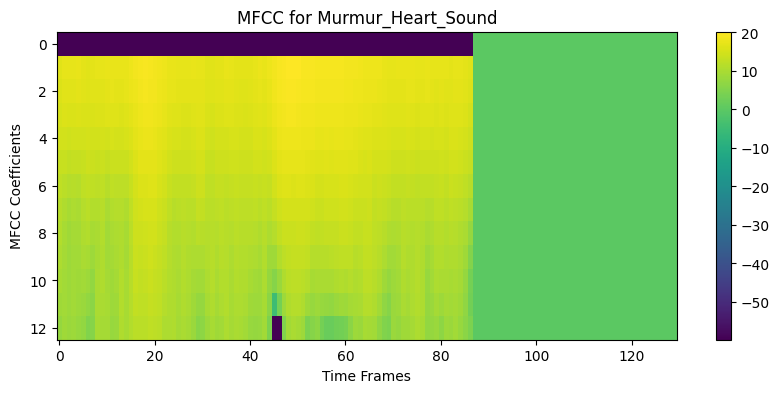

In [21]:
import matplotlib.pyplot as plt

# Plot the MFCC for the first audio file in the dataset
plt.figure(figsize=(10, 4))
plt.imshow(mfcc_features[0], cmap='viridis', aspect='auto')
plt.colorbar()
plt.title(f"MFCC for {labels[0]}")
plt.xlabel("Time Frames")
plt.ylabel("MFCC Coefficients")
plt.show()

## Check Values and Ranges

Yes, the range of values now looks much better. The MFCC values are within a reasonable range:

- **Min value**: ~ -60
- **Max value**: ~ 25
- **Mean value**: ~ -11

This range is typical for MFCCs after converting to the decibel scale. Here’s why this output is correct:

1. **Range**: MFCCs in decibels typically range from around -100 to +100. Your values fall well within this range, with most MFCC values clustered between -60 and 25, which is consistent for audio features.
2. **Negative Mean**: A slightly negative mean is also normal for MFCCs, especially after noise reduction, as MFCCs often capture quieter components of audio as lower values.

With these values, your MFCC extraction seems successful and ready for the next step in the pipeline, which would be data splitting and model training. Let me know if you’d like to move forward with the model setup!

In [22]:
print("MFCC min value:", np.min(mfcc_features))
print("MFCC max value:", np.max(mfcc_features))
print("MFCC mean value:", np.mean(mfcc_features))

MFCC min value: -63.72838
MFCC max value: 24.83407
MFCC mean value: -8.464463


## Confirm Padding and Truncation

The code snippet you mentioned is used to verify that each MFCC array has been **padded or truncated** to a consistent length. This ensures that all audio features have the same number of time frames (columns), which is necessary for feeding data into machine learning models that require fixed-size input.

1. **Loop Through Each Sample**:
   - The loop iterates over each MFCC array in `mfcc_features`, where each `mfcc` represents the features extracted from an individual audio sample.
   
2. **Assertion for Fixed Length**:
   - `assert mfcc.shape[1] == MFCC_MAX_LENGTH` checks whether the **number of time frames** (the second dimension of each MFCC array) equals `MFCC_MAX_LENGTH`.
   - If any `mfcc` array does not match this expected length, the assertion will fail, raising an error with the message `Sample {i} has incorrect length: {mfcc.shape[1]}`.
   
3. **Success Message**:
   - If all samples have the correct length, the code prints `"All samples are padded/truncated to the correct length."`

### Purpose of This Check

The reason we need all samples to be of equal length is that many machine learning models, especially neural networks, require a consistent input shape across all samples. By padding shorter sequences with zeros or truncating longer ones, we ensure a uniform shape, making it easier to batch-process the data during model training.

This code acts as a quality check to confirm that the MFCC extraction and padding/truncation step have correctly standardized the feature arrays. After this verification, you can confidently proceed to data splitting and model training, knowing the data format is consistent.

In [23]:
for i, mfcc in enumerate(mfcc_features):
    assert mfcc.shape[1] == MFCC_MAX_LENGTH, f"Sample {i} has incorrect length: {mfcc.shape[1]}"
print("All samples are padded/truncated to the correct length.")

All samples are padded/truncated to the correct length.


## Label Distribution Check

The **Label Distribution Check** helps verify that the dataset is balanced or at least distributed as expected across different classes (categories). This is important because an unbalanced dataset can lead to a model that performs poorly on underrepresented classes.

### Explanation of Code

```python
from collections import Counter

label_counts = Counter(labels)
print("Label distribution:", label_counts)
```

1. **`Counter`**: The `Counter` function from Python’s `collections` module counts occurrences of each unique element in a list. Here, we use it to count each label in the `labels` array, which contains the class labels (e.g., "Normal Heart Sound," "Murmur Heart Sound").
   
2. **Counting Labels**: `label_counts = Counter(labels)` creates a dictionary-like object where each key is a label (category), and each value is the number of samples that belong to that label.

3. **Print the Results**: `print("Label distribution:", label_counts)` outputs the distribution of labels across the dataset. For example, if you have three categories—Normal, Murmur, and Artifact Heart Sounds—the output might look like:
   ```
   Label distribution: {'Normal Heart Sound': 31, 'Murmur Heart Sound': 34, 'Artifact Heart Sound': 40}
   ```

### Purpose of Label Distribution Check

- **Detect Imbalance**: This check reveals if any category has significantly more or fewer samples than others. For instance, if one category has only 10 samples while another has 100, the model might end up biased toward the more frequent category.
- **Guide for Data Augmentation**: If a class is underrepresented, you may need to add more samples to it, or use techniques like data augmentation to balance the dataset.
- **Ensure Expected Distribution**: This check helps confirm that the data preprocessing and labeling steps were applied correctly, resulting in a dataset that meets your initial expectations.

### What to Look For in the Output

- **Balanced Distribution**: Ideally, each class should have roughly the same number of samples for balanced training.
- **Significant Imbalance**: If the output shows a big disparity between classes, it may be worth addressing this before training. You could adjust the dataset by collecting more samples for underrepresented classes, oversampling, or using class weighting in the model.

By understanding the label distribution, you ensure that the dataset is ready for training and that any imbalances are accounted for in your model design. This check is a standard part of preparing a robust dataset for machine learning.

In [24]:
from collections import Counter
label_counts = Counter(labels)
print("Label distribution:", label_counts)

Label distribution: Counter({'Artifact_Heart_Sound': 320, 'Murmur_Heart_Sound': 231, 'Normal_Heart_sound': 219, 'Extrahals_Heart_Sound': 117})


# Train/Test Split

In [25]:
from sklearn.model_selection import train_test_split

# Split data into train + validation and test sets (85% train+val, 15% test)
X_train_val, X_test, y_train_val, y_test = train_test_split(
    mfcc_features, labels, test_size=0.15, stratify=labels, random_state=42
)

# Further split train + validation into training and validation sets (70% train, 15% val)
X_train, X_val, y_train, y_val = train_test_split(
    X_train_val, y_train_val, test_size=0.1765, stratify=y_train_val, random_state=42
)  # 0.1765 is approximately 15% of the total

# Print the shapes to verify
print("Training set shape:", X_train.shape, y_train.shape)
print("Validation set shape:", X_val.shape, y_val.shape)
print("Test set shape:", X_test.shape, y_test.shape)

Training set shape: (620, 13, 130) (620,)
Validation set shape: (133, 13, 130) (133,)
Test set shape: (134, 13, 130) (134,)


In [26]:
# Check the types and shapes
print("X_train dtype:", X_train.dtype, "shape:", X_train.shape)
print("y_train dtype:", y_train.dtype, "shape:", y_train.shape)
print("X_val dtype:", X_val.dtype, "shape:", X_val.shape)
print("y_val dtype:", y_val.dtype, "shape:", y_val.shape)

X_train dtype: float32 shape: (620, 13, 130)
y_train dtype: <U21 shape: (620,)
X_val dtype: float32 shape: (133, 13, 130)
y_val dtype: <U21 shape: (133,)


In [27]:
from sklearn.preprocessing import LabelEncoder

# Instantiate a LabelEncoder
label_encoder = LabelEncoder()

# Fit and transform the labels for each split
y_train = label_encoder.fit_transform(y_train)
y_val = label_encoder.transform(y_val)
y_test = label_encoder.transform(y_test)

# Verify that labels are now integer-encoded
print("Encoded y_train dtype:", y_train.dtype, "sample:", y_train[:5])
print("Encoded y_val dtype:", y_val.dtype, "sample:", y_val[:5])
print("Encoded y_test dtype:", y_test.dtype, "sample:", y_test[:5])

Encoded y_train dtype: int64 sample: [2 3 2 2 1]
Encoded y_val dtype: int64 sample: [3 3 0 3 2]
Encoded y_test dtype: int64 sample: [0 3 0 1 0]


The increase from 123 audio files to 887 segments occurred because of the **audio segmentation** step. Here’s how it happened:

### Why 123 Files Became 887 Segments

1. **Audio Segmentation**:
   - Each original audio file was split into multiple segments of a fixed duration (e.g., 1-second segments).
   - If an audio file was long enough, it could be divided into several segments, each treated as an individual sample in the dataset.

2. **Segment Count**:
   - For example, if a single audio file is 10 seconds long and we segment it into 1-second intervals, it would produce 10 segments.
   - This segmentation multiplied the number of samples from 123 to 887 because each audio file contributed multiple 1-second segments.

### Breakdown of Segment Counts

On average:
- 123 files produced 887 segments.
- This means each file, on average, generated about `887 / 123 ≈ 7` segments.

### Purpose of Segmenting the Audio Files

Segmenting each file allows the model to focus on smaller portions of audio, making it easier to capture patterns specific to heartbeats or other sounds. It also increases the effective dataset size, helping with model training.

### Verifying the Segmentation Process

If you’d like to see exactly how many segments each file produced, you can add a quick check:

```python
# Dictionary to store the number of segments per file
file_segment_counts = {}

for _, row in noise_reduced_audio_df.iterrows():
    filename = row['filename']
    sample_rate = row['sample_rate']
    noise_reduced_audio = row['noise_reduced_audio']
    
    # Segment the audio file
    segments = segment_audio(noise_reduced_audio, sample_rate)
    file_segment_counts[filename] = len(segments)  # Store the count of segments for each file

# Print the segment counts for each file
for filename, count in file_segment_counts.items():
    print(f"{filename}: {count} segments")

# Total number of segments
print("Total segments:", sum(file_segment_counts.values()))
```

This code will print the number of segments generated per file and confirm the total. Let me know if you’d like to adjust the segmentation approach, or if this clears up the increase in segment count!

# Model Architecture Design

To create a Bidirectional LSTM model for classifying heart sounds, we’ll use the segmented MFCC features extracted from each audio segment as input. The Bidirectional LSTM model is suitable for this task as it can capture sequential dependencies in both directions, which is useful for understanding time-series data like audio.

### Model Architecture Design

1. **Input Layer**: The model will accept input with shape `(13, 130)`, which represents the 13 MFCC features for each of the 130 time frames.
2. **Bidirectional LSTM Layers**: We'll add Bidirectional LSTM layers to capture temporal dependencies in both directions.
3. **Dense Layers**: These layers will perform the final classification, outputting the probability of each class.
4. **Output Layer**: Using a `softmax` activation for multi-class classification, where the number of units matches the number of classes (heart sound categories).

Let’s build this model using TensorFlow and Keras.

### Model Code

Here’s the code to create, compile, and summarize the Bidirectional LSTM model.

```python
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Bidirectional, LSTM, Dropout, Flatten

# Define the model
model = Sequential()

# Bidirectional LSTM layers
model.add(Bidirectional(LSTM(64, return_sequences=True), input_shape=(13, 130)))
model.add(Dropout(0.3))  # Dropout to prevent overfitting

model.add(Bidirectional(LSTM(32)))  # Second LSTM layer
model.add(Dropout(0.3))

# Dense layers
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(32, activation='relu'))

# Output layer
num_classes = len(set(labels))  # Number of classes
model.add(Dense(num_classes, activation='softmax'))

# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Model summary
model.summary()
```

### Explanation of Each Layer

1. **Bidirectional LSTM Layers**:
   - The first layer is a Bidirectional LSTM with 64 units, which returns sequences (`return_sequences=True`) to allow stacking another LSTM layer.
   - The second Bidirectional LSTM has 32 units and does not return sequences, as this layer outputs a single vector summarizing the segment.
   - **Dropout Layers**: Dropout layers with a rate of 0.3 are added to prevent overfitting.

2. **Dense and Flatten Layers**:
   - The `Flatten` layer reshapes the output from the LSTM layer to make it compatible with the dense layers.
   - Two dense layers with ReLU activation are used to learn complex patterns. These layers also include Dropout for regularization.

3. **Output Layer**:
   - The output layer has `num_classes` units, each representing a category of heart sounds, with `softmax` activation to output a probability distribution over the classes.

### Model Compilation

- **Loss Function**: `sparse_categorical_crossentropy` is used because the labels are integer-encoded, making it appropriate for multi-class classification.
- **Optimizer**: `Adam` is chosen for its adaptability and efficiency in training.
- **Metrics**: We’re tracking `accuracy` to monitor performance.

In [28]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Bidirectional, LSTM, Dropout, Flatten

# Define the model
model = Sequential()

# Bidirectional LSTM layers
model.add(Bidirectional(LSTM(64, return_sequences=True), input_shape=(13, 130)))
model.add(Dropout(0.3))  # Dropout to prevent overfitting

model.add(Bidirectional(LSTM(32)))  # Second LSTM layer
model.add(Dropout(0.3))

# Dense layers
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(32, activation='relu'))

# Output layer
num_classes = len(set(labels))  # Number of classes
model.add(Dense(num_classes, activation='softmax'))

# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Model summary
model.summary()


/opt/conda/lib/python3.10/site-packages/keras/src/layers/rnn/bidirectional.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ bidirectional (Bidirectional)   │ (None, 13, 128)        │        99,840 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 13, 128)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional_1 (Bidirectional) │ (None, 64)             │        41,216 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 4)              │           132 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 147,428 (575.89 KB)

 Trainable params: 147,428 (575.89 KB)

 Non-trainable params: 0 (0.00 B)

### Model Compilation

- **Loss Function**: `sparse_categorical_crossentropy` is used because the labels are integer-encoded, making it appropriate for multi-class classification.
- **Optimizer**: `Adam` is chosen for its adaptability and efficiency in training.
- **Metrics**: We’re tracking `accuracy` to monitor performance.

### Training the Model

To train the model, we’ll need to specify the training, validation, and test data, as well as any necessary callbacks.

```python
# Training parameters
batch_size = 32
epochs = 30  # Adjust based on model performance

# Early stopping callback
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Train the model
history = model.fit(
    X_train, y_train,
    validation_data=(X_val, y_val),
    epochs=epochs,
    batch_size=batch_size,
    callbacks=[early_stopping]
)
```

### Explanation of Training Setup

- **Batch Size**: Set to 32, which is a typical choice for moderate-sized datasets. This can be tuned based on available computational resources.
- **Epochs**: Set to 30 as a starting point. The `EarlyStopping` callback will automatically stop training if the model’s performance on the validation set does not improve for 5 epochs, helping to prevent overfitting.
- **EarlyStopping Callback**: Monitors `val_loss` to stop training once the model starts overfitting (i.e., when validation loss no longer decreases).

### Evaluation

After training, you can evaluate the model’s performance on the test set.

```python
# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f"Test Loss: {test_loss}")
print(f"Test Accuracy: {test_accuracy}")
```

### Summary of the Steps

1. **Define and Compile** the Bidirectional LSTM model.
2. **Train** the model on `X_train` and `y_train`, with validation on `X_val` and `y_val`.
3. **Evaluate** the trained model on the `X_test` and `y_test` to measure its generalization performance.

In [29]:
# Training parameters
batch_size = 32
epochs = 30  # Adjust based on model performance

# Early stopping callback
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Train the model
history = model.fit(
    X_train, y_train,
    validation_data=(X_val, y_val),
    epochs=epochs,
    batch_size=batch_size,
    callbacks=[early_stopping]
)

Epoch 1/30
20/20 ━━━━━━━━━━━━━━━━━━━━ 9s 63ms/step - accuracy: 0.3672 - loss: 1.2880 - val_accuracy: 0.5865 - val_loss: 1.0298
Epoch 2/30
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - accuracy: 0.5947 - loss: 0.9906 - val_accuracy: 0.5940 - val_loss: 0.8852
Epoch 3/30
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - accuracy: 0.6731 - loss: 0.8181 - val_accuracy: 0.6316 - val_loss: 0.8416
Epoch 4/30
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.7278 - loss: 0.6988 - val_accuracy: 0.6391 - val_loss: 0.8417
Epoch 5/30
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.7473 - loss: 0.6311 - val_accuracy: 0.6466 - val_loss: 0.8419
Epoch 6/30
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.7818 - loss: 0.5681 - val_accuracy: 0.6391 - val_loss: 0.8698
Epoch 7/30
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.8263 - loss: 0.4513 - val_accuracy: 0.6692 - val_loss: 0.9300
Epoch 8/30
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.8596 - loss: 0.4028 - val_accuracy: 0.6541 - v

# Evaluation

In [30]:
# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f"Test Loss: {test_loss}")
print(f"Test Accuracy: {test_accuracy}")

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6578 - loss: 0.8047 
Test Loss: 0.7854437828063965
Test Accuracy: 0.6791045069694519
